In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

train_df = pd.read_csv('./datasets/blueberry-regression/train.csv')
test_df = pd.read_csv('./datasets/blueberry-regression/test.csv')

In [3]:
X_train = train_df.drop('yield', axis=1)
y_train = train_df['yield']
X_test = test_df

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)
y_pred_val = model.predict(X_val)

In [5]:
mae = mean_absolute_error(y_val, y_pred_val)

print(f'Validation Mean Absolute Error: {mae}')

Validation Mean Absolute Error: 260.2689386558666


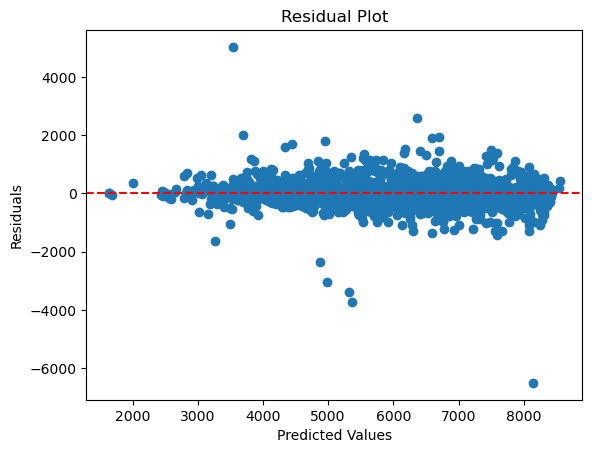

In [9]:
# Random Forest Plot
residuals = y_val - y_pred_val
plt.scatter(y_pred_val, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()